# **Trabalho 3 - SME0823 Modelos de Regressão e Aprendizado Supervisionado II**

Gustavo Terra Brandão da Silva - NUSP:11274935 <br>
Olavo Morais Borges Pereira - NUSP:11297792

# Introdução

Neste trabalho, utilizamos um conjunto de dados que reúne diversas características de uma residência e o seu valor de mercado. Nosso propósito é desenvolver um modelo que se adapte bem aos dados e possa estimar o valor de uma residência a partir de suas características.

Organizamos as tarefas da seguinte forma:  


1.   Importar e analisar o conjunto de dados
2.   Ajustar modelos candidatos
3.   Realizar análise de resíduos para avaliar a qualidade do ajuste dos modelos
4.   Interpretar os coeficientes dos modelos que fizeram um ajuste satisfatório


O conjunto de dados pode ser obtido por meio do link: http://static.lib.virginia.edu/statlab/materials/data/alb_homes.csv

# Importação e Análise do Conjunto de Dados

Importando bibliotecas usadas pelo código

In [ ]:
#Importando bibliotecas usadas
if (!requireNamespace("gamlss", quietly = TRUE)) install.packages("gamlss")
if (!requireNamespace("gamlss.data", quietly = TRUE)) install.packages("gamlss.data")
if (!requireNamespace("gamlss.add", quietly = TRUE)) install.packages("gamlss.add")
if (!requireNamespace("MASS", quietly = TRUE)) install.packages("MASS")
install.packages("tidyverse")
install.packages("modelr")
install.packages("recipes")
install.packages("parsnip")
install.packages("rsample")
library(rsample)
library(tidyverse)
library(modelr)
library(recipes)
library(parsnip)
library(gamlss)
library(gamlss.data)
library(gamlss.add)
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("recipes"):
“installation of package ‘recipes’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



O conjunto de dados possui as seguintes variáveis explicativas:

*   Yearbuilt: ano de construção da casa
*   Finsqft: tamanho da casa em pés quadrados
*   Cooling: indica se a casa possui sistema central de resfriamento
*   Bedroom: número de quartos
*   Fullbath: número de banheiros "completos" (vaso, chuveiro e pia)
*   Halfbath: número de banheiros "incompletos" (vaso e pia apenas)
*   Lotsize: tamanho do terreno em acres
*   Totalvalue: total pela casa e terreno
*   Esdistrict: escola primária que atende à residência
*   Msdistrict: escola secundária que atende à residência
*   Hsdistrict: escola de ensino superior que atende à residência
*   Censustract: setor censitário ao qual a residência pertence
*   Age: idade da casa em anos
*   Condition: condição da casa
*   Fp: se a casa possui lareira







In [ ]:
# Carregar os dados
df <- read.csv("alb_homes.csv", header = TRUE, dec = ".")

# Definir variáveis categóricas e numéricas
numeric_features <- c('finsqft', 'bedroom', 'fullbath', 'halfbath', 'lotsize', 'age')
categorical_features <- c('cooling', 'esdistrict', 'msdistrict', 'hsdistrict', 'condition', 'fp')

# Converter variáveis categóricas para fatores e remover NA's
df <- df %>%
  mutate(across(all_of(categorical_features), as.factor)) %>%
  na.omit()

Mostrando os histrogramas de cada variável explicativa:

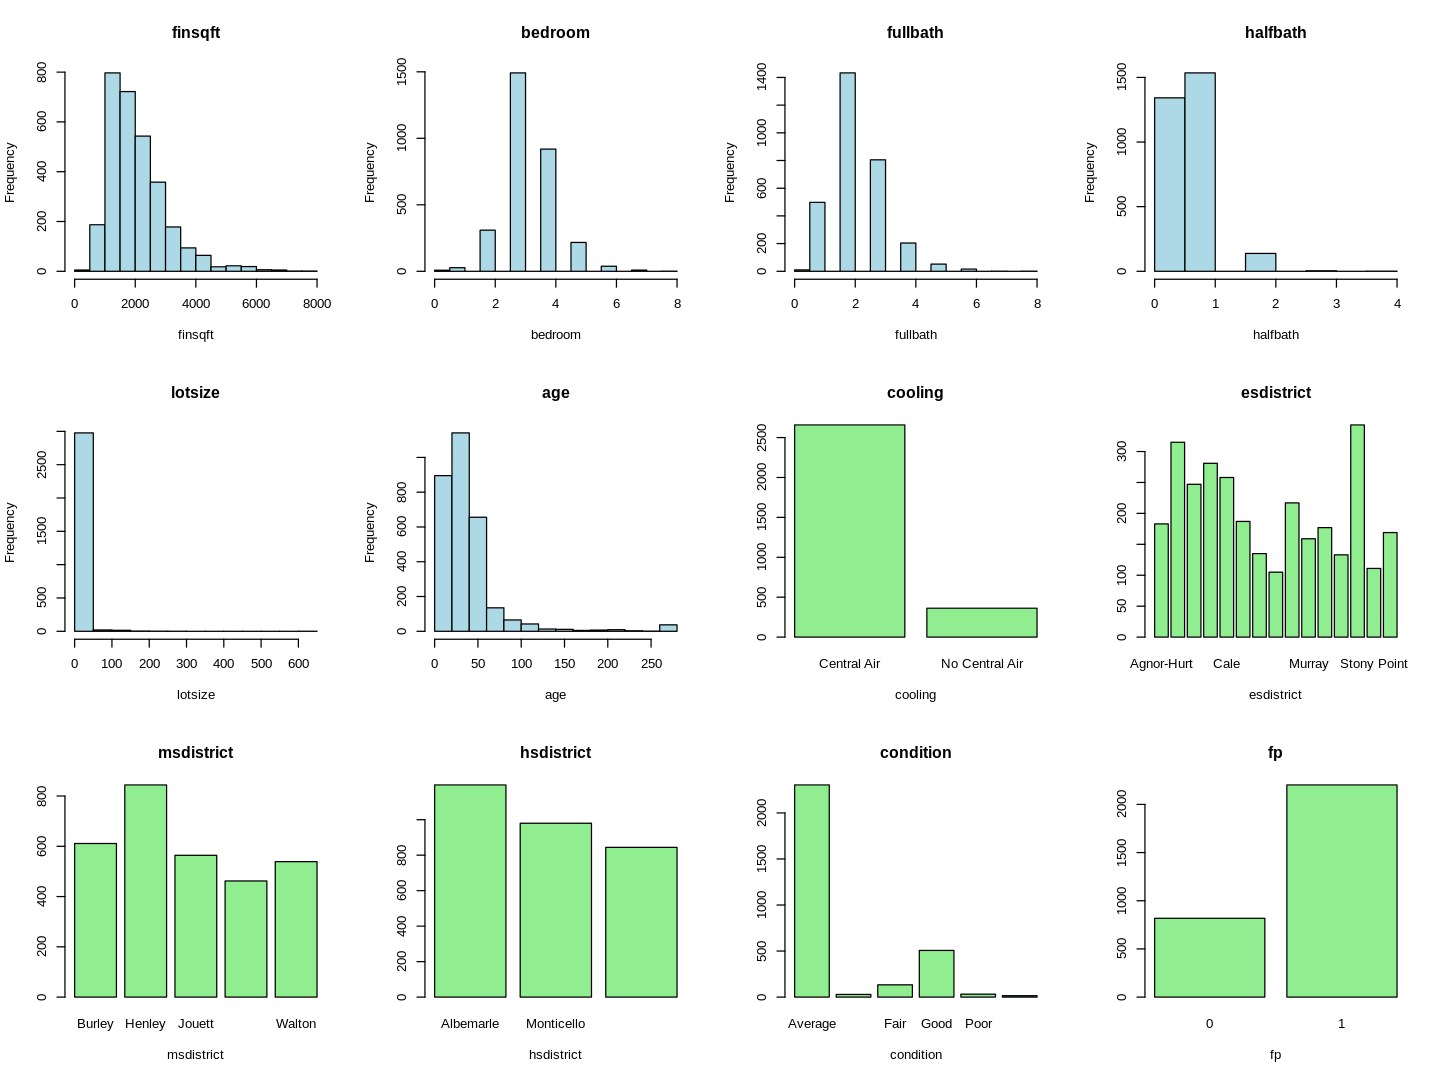

In [ ]:
# Definir o tamanho da tela gráfica
options(repr.plot.width = 12, repr.plot.height = 9)

# Criar uma tabela de gráficos com 4 colunas e 3 linhas
par(mfrow = c(3, 4))

# Plotar histogramas das variáveis numéricas
for (var in numeric_features) {
  hist(df[[var]], main = var, xlab = var, col = "lightblue")
}

# Plotar gráficos de barras das variáveis categóricas
for (var in categorical_features) {
  barplot(table(df[[var]]), main = var, xlab = var, col = "lightgreen")
}

# Dividir os dados em conjuntos de treino e teste
set.seed(42)
data_split <- initial_split(df, prop = 0.8)
train_data <- training(data_split)
test_data <- testing(data_split)

# Modelo Normal

Em primeiro lugar, tentamos a distribuição normal por se tratar de uma escolha natural para o problema. Fizemos a seleção de variáveis usando stepGAIC.

In [ ]:
# Ajustar o modelo Normal
modelo_normal <- gamlss(totalvalue ~ ., data = train_data, family = NO)

# Seleção de variáveis com GAIC
modelo_normal_selecionado <- stepGAIC(modelo_normal, method = "backward")

# Resumo do modelo
summary(modelo_normal_selecionado)

GAMLSS-RS iteration 1: Global Deviance = 66306.02 
GAMLSS-RS iteration 2: Global Deviance = 66305.25 
GAMLSS-RS iteration 3: Global Deviance = 66305.25 
Distribution parameter:  mu 
Start:  AIC= 66371.25 
 totalvalue ~ yearbuilt + finsqft + cooling + bedroom + fullbath +  
    halfbath + lotsize + esdistrict + msdistrict + hsdistrict +  
    censustract + age + condition + fp 


Step:  AIC= 66371.25 
 totalvalue ~ yearbuilt + finsqft + cooling + bedroom + fullbath +  
    halfbath + lotsize + esdistrict + msdistrict + hsdistrict +  
    censustract + condition + fp 


Step:  AIC= 66371.25 
 totalvalue ~ yearbuilt + finsqft + cooling + bedroom + fullbath +  
    halfbath + lotsize + esdistrict + msdistrict + censustract +  
    condition + fp 

              Df   AIC
- msdistrict   3 66368
- censustract  1 66370
- fp           1 66371
- yearbuilt    1 66371
<none>           66371
- halfbath     1 66371
- cooling      1 66371
- bedroom      1 66383
- condition    5 66420
- fullbath     1

Warning message in summary.gamlss(modelo_normal_selecionado):
“summary: vcov has failed, option qr is used instead
”


******************************************************************
Family:  c("NO", "Normal") 

Call:  gamlss(formula = totalvalue ~ finsqft + cooling + bedroom + fullbath +  
    lotsize + esdistrict + condition, family = NO, data = train_data,  
    trace = FALSE) 

Fitting method: RS() 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -1.537e+05  1.133e+04 -13.565  < 2e-16 ***
finsqft                     2.273e+02  3.272e+00  69.459  < 2e-16 ***
coolingNo Central Air       3.052e+04  7.381e+03   4.135 3.68e-05 ***
bedroom                    -2.453e+04  3.028e+03  -8.100 8.66e-16 ***
fullbath                    6.747e+04  3.319e+03  20.327  < 2e-16 ***
lotsize                     4.192e+03  1.045e+02  40.126  < 2e-16 ***
esdistrictBaker-Butler     -2.100e+04  1.042e+04  -2.016  0.04393 *  
esdistrictBroadus Wood     -1.853e+0

Verificando se o modelo faz um bom ajuste:

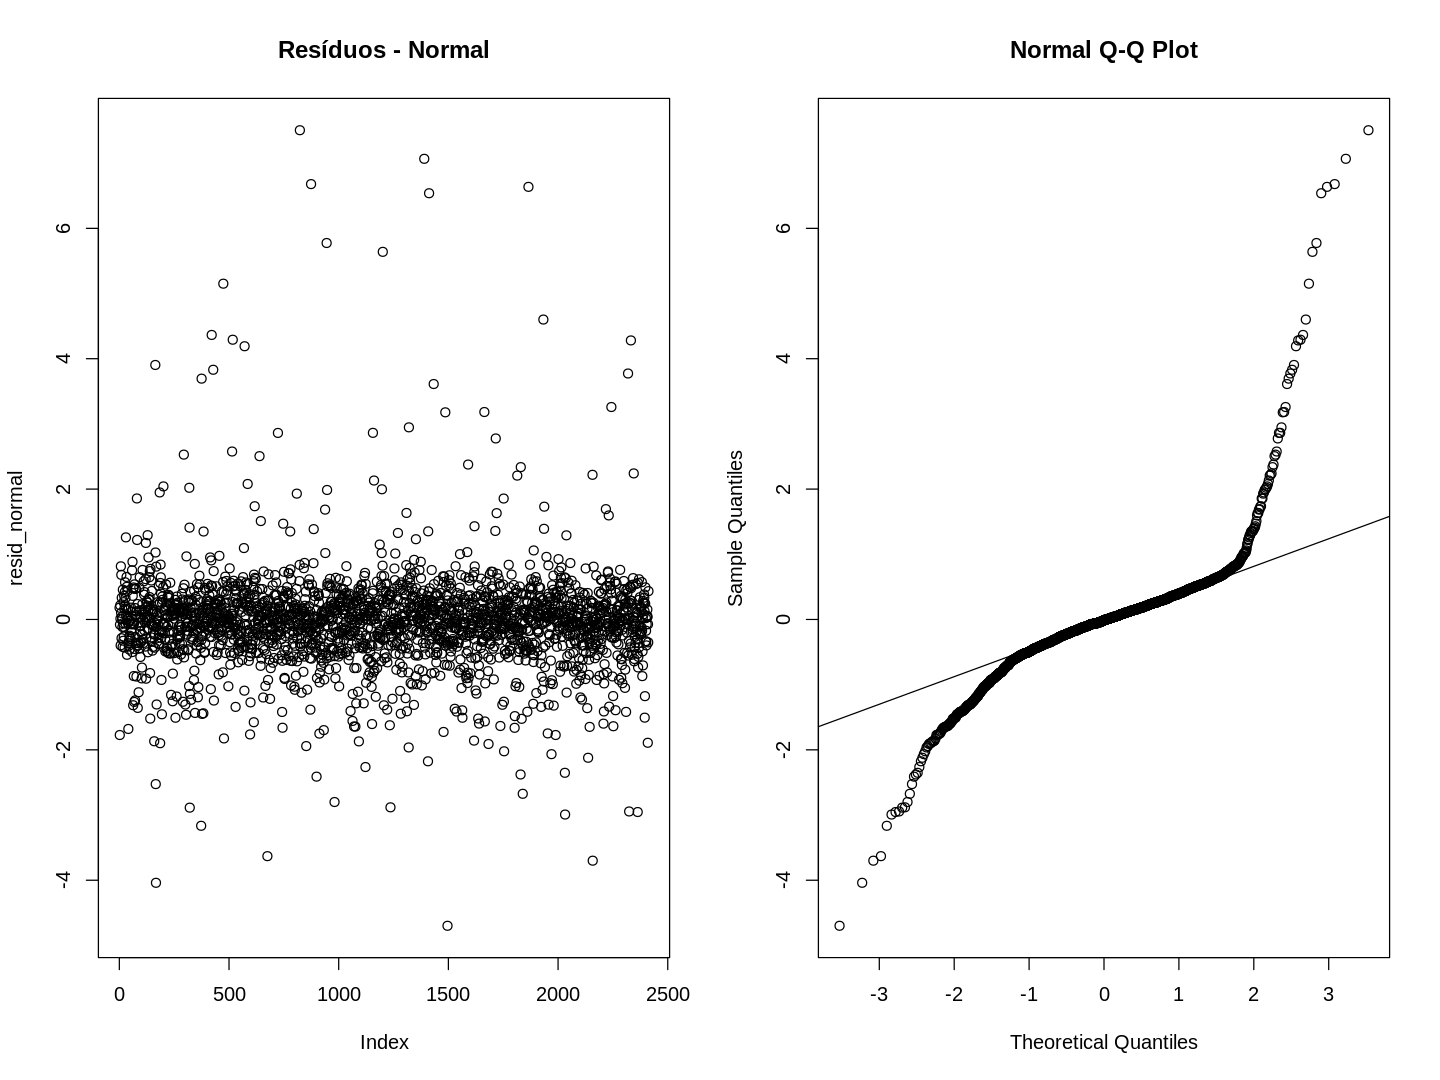

In [ ]:
# Função para inspecionar e limitar resíduos
limit_resid <- function(resid, limit = 10) {
  resid <- resid[!is.na(resid) & !is.infinite(resid)]  # Remover NA e infinitos
  resid[resid > limit] <- limit  # Limitar valores extremos
  resid[resid < -limit] <- -limit
  resid
}

# Obter e limitar resíduos dos modelos
resid_normal <- limit_resid(resid(modelo_normal_selecionado))

# Análise de resíduos
par(mfrow = c(1, 2))
plot(resid_normal, main = "Resíduos - Normal")
qqnorm(resid_normal); qqline(resid_normal)

As extremidades do gráfico Q-Q indica que os resíduos não se aproximam de uma distribuição normal. Dessa forma, é possível verificar que a distribuição normal não se ajustou bem aos dados.

# Modelo LogNormal

Um modelo muito usado e que pode gerar um bom ajuste é o modelo LogNormal, especialmente quando lidamos com dados que envolvem valores positivos. A distribuição LogNormal é frequentemente aplicada em situações em que os dados estão naturalmente restritos a valores não negativos, como é o caso dos preços de casas.

In [ ]:
# Ajustar o modelo LogNormal
modelo_lognormal <- gamlss(totalvalue ~ ., data = train_data, family = LOGNO)

# Seleção de variáveis com GAIC
modelo_lognormal_selecionado <- stepGAIC(modelo_lognormal, method = "backward")

# Resumo do modelo
summary(modelo_lognormal_selecionado)

GAMLSS-RS iteration 1: Global Deviance = 62030.08 
GAMLSS-RS iteration 2: Global Deviance = 62030.08 
Distribution parameter:  mu 
Start:  AIC= 62096.08 
 totalvalue ~ yearbuilt + finsqft + cooling + bedroom + fullbath +  
    halfbath + lotsize + esdistrict + msdistrict + hsdistrict +  
    censustract + age + condition + fp 


Step:  AIC= 62096.08 
 totalvalue ~ yearbuilt + finsqft + cooling + bedroom + fullbath +  
    halfbath + lotsize + esdistrict + msdistrict + hsdistrict +  
    censustract + condition + fp 


Step:  AIC= 62096.08 
 totalvalue ~ yearbuilt + finsqft + cooling + bedroom + fullbath +  
    halfbath + lotsize + esdistrict + msdistrict + censustract +  
    condition + fp 

              Df   AIC
- bedroom      1 62094
- censustract  1 62095
- msdistrict   3 62096
<none>           62096
- halfbath     1 62098
- cooling      1 62120
- yearbuilt    1 62136
- fp           1 62193
- fullbath     1 62235
- condition    5 62285
- esdistrict  13 62355
- lotsize      1 6257

Verificando se o modelo faz um bom ajuste:

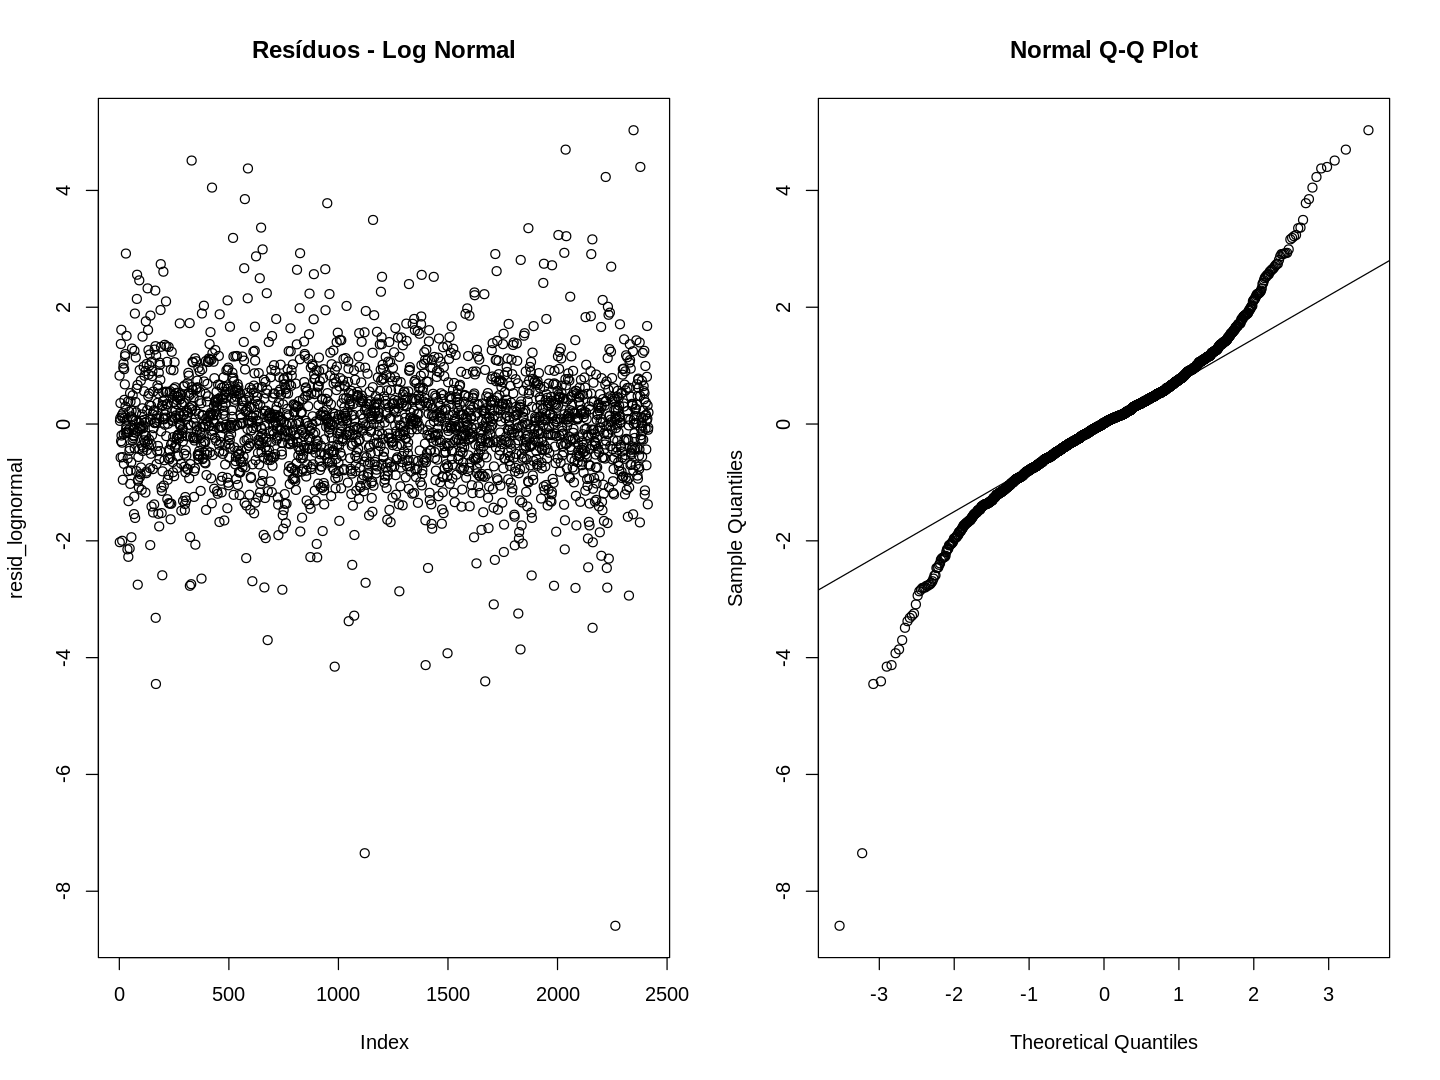

In [ ]:
# Função para inspecionar e limitar resíduos
limit_resid <- function(resid, limit = 10) {
  resid <- resid[!is.na(resid) & !is.infinite(resid)]  # Remover NA e infinitos
  resid[resid > limit] <- limit  # Limitar valores extremos
  resid[resid < -limit] <- -limit
  resid
}

# Obter e limitar resíduos dos modelos
resid_lognormal <- limit_resid(resid(modelo_lognormal_selecionado))

# Análise de resíduos
par(mfrow = c(1, 2))
plot(resid_lognormal, main = "Resíduos - Log Normal")
qqnorm(resid_lognormal); qqline(resid_lognormal)

A dispersão no gráfico é menos padronizada do que a dispersão da distribuição normal, mas ainda não é totalmente aleatória. Além disso, o gráfico Q-Q revela um desvio, especialmente nos valores mais próximos das extremidades.

# Modelo BCT

Após uma análise exploratória, uma distribuição GAMLSS se mostrou uma boa candidata: distribuição Box-Cox T, que consiste em aplicar uma transformação de Box-Cox em uma variável aleatória que segue uma distribuição t de Student. Essa escolha é particularmente relevante quando lidamos com conjuntos de dados que exibem heterocedasticidade ou caudas pesadas, comumente observadas em dados imobiliários.

In [ ]:
# Ajustar o modelo BCT
modelo_bct <- gamlss(totalvalue ~ ., data = train_data, family = BCT)

# Seleção de variáveis com GAIC
modelo_bct_selecionado <- stepGAIC(modelo_bct, method = "backward")

# Resumo dos modelos
summary(modelo_bct_selecionado)

GAMLSS-RS iteration 1: Global Deviance = 61742.87 
GAMLSS-RS iteration 2: Global Deviance = 61643.24 
GAMLSS-RS iteration 3: Global Deviance = 61623.37 
GAMLSS-RS iteration 4: Global Deviance = 61618.78 
GAMLSS-RS iteration 5: Global Deviance = 61617.69 
GAMLSS-RS iteration 6: Global Deviance = 61617.43 
GAMLSS-RS iteration 7: Global Deviance = 61617.36 
GAMLSS-RS iteration 8: Global Deviance = 61617.34 
GAMLSS-RS iteration 9: Global Deviance = 61617.34 
GAMLSS-RS iteration 10: Global Deviance = 61617.34 
GAMLSS-RS iteration 11: Global Deviance = 61617.34 
Distribution parameter:  mu 
Start:  AIC= 61687.34 
 totalvalue ~ yearbuilt + finsqft + cooling + bedroom + fullbath +  
    halfbath + lotsize + esdistrict + msdistrict + hsdistrict +  
    censustract + age + condition + fp 



Warning message in RS():
“Algorithm RS has not yet converged”



Step:  AIC= 61687.34 
 totalvalue ~ yearbuilt + finsqft + cooling + bedroom + fullbath +  
    halfbath + lotsize + esdistrict + msdistrict + hsdistrict +  
    censustract + condition + fp 



Warning message in RS():
“Algorithm RS has not yet converged”



Step:  AIC= 61687.34 
 totalvalue ~ yearbuilt + finsqft + cooling + bedroom + fullbath +  
    halfbath + lotsize + esdistrict + msdistrict + censustract +  
    condition + fp 



Warning message in RS():
“Algorithm RS has not yet converged”


              Df   AIC
- halfbath     1 61685
- cooling      1 61686
- censustract  1 61686
- bedroom      1 61686
<none>           61687
- msdistrict   3 61690
- fp           1 61737
- yearbuilt    1 61737
- condition    5 61765
- fullbath     1 61862
- esdistrict  13 61941
- lotsize      1 62063
- finsqft      1 63017

Step:  AIC= 61685.39 
 totalvalue ~ yearbuilt + finsqft + cooling + bedroom + fullbath +  
    lotsize + esdistrict + msdistrict + censustract + condition +  
    fp 



Warning message in RS():
“Algorithm RS has not yet converged”


              Df   AIC
- cooling      1 61684
- censustract  1 61684
- bedroom      1 61684
<none>           61685
- msdistrict   3 61689
- fp           1 61735
- yearbuilt    1 61736
- condition    5 61763
- fullbath     1 61870
- esdistrict  13 61939
- lotsize      1 62062
- finsqft      1 63143

Step:  AIC= 61683.64 
 totalvalue ~ yearbuilt + finsqft + bedroom + fullbath + lotsize +  
    esdistrict + msdistrict + censustract + condition + fp 



Warning message in RS():
“Algorithm RS has not yet converged”


              Df   AIC
- censustract  1 61682
- bedroom      1 61683
<none>           61684
- msdistrict   3 61687
- fp           1 61733
- yearbuilt    1 61738
- condition    5 61764
- fullbath     1 61868
- esdistrict  13 61937
- lotsize      1 62060
- finsqft      1 63149

Step:  AIC= 61682.39 
 totalvalue ~ yearbuilt + finsqft + bedroom + fullbath + lotsize +  
    esdistrict + msdistrict + condition + fp 



Warning message in RS():
“Algorithm RS has not yet converged”


             Df   AIC
- bedroom     1 61681
<none>          61682
- msdistrict  3 61686
- fp          1 61732
- yearbuilt   1 61737
- condition   5 61762
- fullbath    1 61867
- esdistrict 13 61941
- lotsize     1 62058
- finsqft     1 63148

Step:  AIC= 61681.19 
 totalvalue ~ yearbuilt + finsqft + fullbath + lotsize + esdistrict +  
    msdistrict + condition + fp 



Warning message in RS():
“Algorithm RS has not yet converged”


             Df   AIC
<none>          61681
- msdistrict  3 61684
- fp          1 61730
- yearbuilt   1 61737
- condition   5 61764
- fullbath    1 61887
- esdistrict 13 61941
- lotsize     1 62057
- finsqft     1 63270
******************************************************************
Family:  c("BCT", "Box-Cox t") 

Call:  gamlss(formula = totalvalue ~ yearbuilt + finsqft +  
    fullbath + lotsize + esdistrict + msdistrict +  
    condition + fp, family = BCT, data = train_data,      trace = FALSE) 

Fitting method: RS() 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -5.248e+05  2.521e+04 -20.813  < 2e-16 ***
yearbuilt                   2.562e+02  1.281e+01  19.992  < 2e-16 ***
finsqft                     1.393e+02  2.862e+00  48.679  < 2e-16 ***
fullbath                    3.178e+04  2.177e+03  14.594  < 2e-16 ***
lotsiz

Verificando se o modelo fez um bom ajuste:

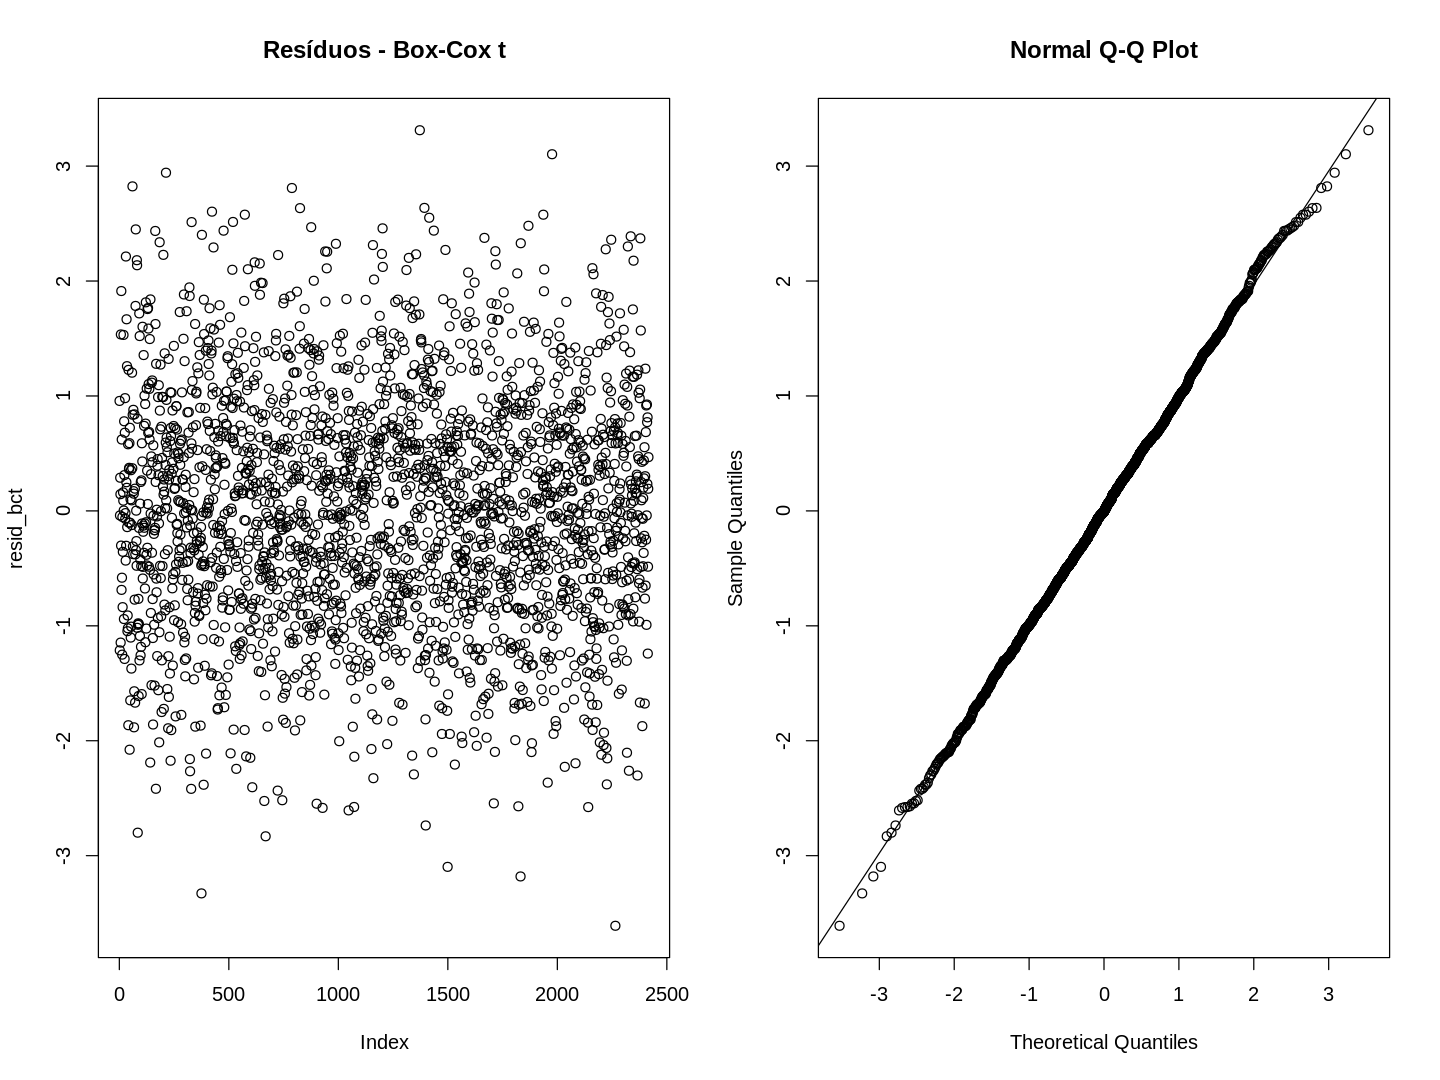

In [ ]:
# Função para inspecionar e limitar resíduos
limit_resid <- function(resid, limit = 10) {
  resid <- resid[!is.na(resid) & !is.infinite(resid)]  # Remover NA e infinitos
  resid[resid > limit] <- limit  # Limitar valores extremos
  resid[resid < -limit] <- -limit
  resid
}

# Obter e limitar resíduos dos modelos
resid_bct <- limit_resid(resid(modelo_bct_selecionado))

# Análise de resíduos
par(mfrow = c(1, 2))
plot(resid_bct, main = "Resíduos - Box-Cox t")
qqnorm(resid_bct); qqline(resid_bct)

O gráfico de dispersão parece ter uma dispersão aleatória dos resíduos, que é o que esperamos ver. O gráfico Q-Q também mostra os pontos mais próximos da linha diagonal em comparação com os outros dois, sugerindo que os resíduos seguem mais de perto uma distribuição normal.

A partir destes gráficos, parece que a transformação Box-Cox pode estar fornecendo o melhor ajuste, porque ela tende a normalizar os resíduos mais efetivamente que as outras transformações, o que é indicado pela dispersão aleatória dos resíduos e pela conformidade no gráfico Q-Q.

# Interpretação dos Coeficientes

A função Summary nos permite ver quais os coeficientes da regressão e interpretar esses coeficientes:

In [ ]:
summary(modelo_bct_selecionado)

******************************************************************
Family:  c("BCT", "Box-Cox t") 

Call:  gamlss(formula = totalvalue ~ yearbuilt + finsqft +  
    fullbath + lotsize + esdistrict + msdistrict +  
    condition + fp, family = BCT, data = train_data,      trace = FALSE) 

Fitting method: RS() 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -5.248e+05  2.521e+04 -20.813  < 2e-16 ***
yearbuilt                   2.562e+02  1.281e+01  19.992  < 2e-16 ***
finsqft                     1.393e+02  2.862e+00  48.679  < 2e-16 ***
fullbath                    3.178e+04  2.177e+03  14.594  < 2e-16 ***
lotsize                     5.621e+03  3.249e+02  17.301  < 2e-16 ***
esdistrictBaker-Butler      2.301e+04  1.923e+04   1.196 0.231757    
esdistrictBroadus Wood      1.846e+04  1.055e+04   1.750 0.080304 .  
esdistrictBrowns

Como estamos usando a função identidade como função de ligação, os coeficientes do modelo representam a mudança esperada na variável dependente para um aumento de uma unidade na variável independente correspondente, mantendo todas as outras variáveis constantes.

*   Yearbuilt: Um aumento de um ano na idade da casa está associado a um aumento médio de 256,2 unidades na variável dependente.

*   Finsqft: Um aumento de uma unidade está associado a um aumento médio de 139,3 unidades na variável dependente.

*   Fullbath: Adicionar um banheiro completo à casa está associado a um aumento médio de 31.780 unidades na variável dependente.

*   Lotsize: Um aumento de uma unidade em lotsize está associado a um aumento médio de 5.621 unidades na variável dependente.

*   Fp: A presença de uma lareira está associada a um aumento de 20.120 unidades no valor médio da casa.

Já as variáveis Esdistrict, Msdistrict e Condition, que são variáveis categóricas, influenciam no preço da casa de maneira diferente, a depender do valor assumido. Para a variável Esdistrict temos:

*   Baker-Butler: 23.010

*   Broadus Wood: 18.460

*   Brownsville: 12.730

*   Cale: 20.060

*   Crozet: -3.315

*   Greer: 9.925

*   Hollymead: 37.680

*   Meriwether Lewis: 73.780

*   Murray: 128.200

*   Red Hill: -33.700

*   Scottsville: -48.780

*   Stone-Robinson: -12.280

*   Stony Point: 29.000

*   Woodbrook: 18.870

Para a variável Msdistrict:

*   Jouett: -17.500

*   Sutherland: -32.290

*   Walton: 3.526

Para a variável Condition:

*   Excellent: 46.310

*   Good: 16.380

*   Fair: -29.370

*   Poor: -11.450

*   Substandard: -28.790

# Conclusão

Gostamos do trabalho, pois tivemos a oportunidade de colocar em prática conceitos aprendidos ao longo do curso, como a seleção de variáveis com stepGAIC, análise de ajustes com resíduos. Além disso, tivemos a chance de comparar os modelos GLM com os modelos GAMLSS, os quais estudamos recentemente em sala de aula.